<a href="https://colab.research.google.com/github/magladko/NAI/blob/master/mpp3/mpp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [109]:
PATH_SPLITTER = "/"

# path to project directory on Google Drive
PATH = "/content/drive/MyDrive/4. semestr/NAI/mpp3/"
LANGS_PATH = PATH + "langs"

##Util functions for deleting and counting letters in file

In [84]:
def delete_non_ascii_characters(file):
    parsed_path = PATH_SPLITTER.join(file.split(PATH_SPLITTER)[:-1])+PATH_SPLITTER+'parsed_'+file.split(PATH_SPLITTER)[-1]
    with open(file, 'r', encoding='utf8') as infile, open(parsed_path, 'w', encoding='ascii') as outfile:
        for line in infile:
            try:
                outfile.write(''.join(i.lower() for i in line if ord('z') >= ord(i) >= ord('a')))
            except UnicodeDecodeError:
                pass
    os.remove(file)
    os.rename(parsed_path, file)


def count_distinct_letters(file):
    res = np.zeros(ord("z")-ord("a")+1)
    with open(file, 'r') as f:
        for line in f:
            for char in line:
                res[ord(char.lower())-ord("a")] += 1
    return res

##Perceptron class

In [85]:
class Perceptron:
    def __init__(self, language, theta=0, alpha=0.1, beta=0.1):
        self.lang = language
        self.W = np.random.rand(ord("z")-ord("a")+1)
        self.theta = theta
        self.alpha = alpha
        self.beta = beta

    def calc_linear_output(self, X):
        return np.dot(self.W, X)

    def calc_discrete_output(self, X):
        return 1 if self.calc_linear_output(X) >= self.theta else 0

    def test_all(self, langs_dir):
        true_positives = 0
        true_negatives = 0
        false_positives = 0
        false_negatives = 0

        X = np.zeros(ord("z")-ord("a")+1)

        for root, dirs, files in os.walk(langs_dir):
            answer = 1 if root.split(PATH_SPLITTER)[-1] == self.lang else 0
            for file in files:
                delete_non_ascii_characters(os.path.join(root, file))
                X = count_distinct_letters(os.path.join(root, file))
                guess = self.calc_discrete_output(X)
                if guess == answer:
                    if guess == 1:
                        true_positives += 1
                    else:
                        true_negatives += 1
                else:
                    if guess == 1:
                        false_positives += 1
                    else:
                        false_negatives += 1

        return {"true_positives": true_positives, 
                "true_negatives": true_negatives, 
                "false_positives": false_positives,
                "false_negatives": false_negatives}

    def guess_linear(self, lang_doc):
        delete_non_ascii_characters(lang_doc)
        X = count_distinct_letters(lang_doc)
        return self.calc_linear_output(X)

    def train(self, langs_dir, epochs):
        guess = 0
        answer = 0

        X = np.zeros(ord("z")-ord("a")+1)

        for i in range(epochs):
            for root, dirs, files in os.walk(langs_dir):
                answer = 1 if root.split(PATH_SPLITTER)[-1] == self.lang else 0
                for file in files:
                    delete_non_ascii_characters(os.path.join(root, file))
                    X = count_distinct_letters(os.path.join(root, file))
                    guess = self.calc_discrete_output(X)

                    self.W += (answer - guess) * self.alpha * X
                    self.theta -= (answer - guess) * self.beta
                # normalize weights
                self.W /= np.linalg.norm(self.W, ord=2)
    
    def print_properties(self):
        print(self.lang)
        print("W:", self.W)
        print("theta:", self.theta)
        print()

In [101]:
#@title Learning properties { run: "auto" }
theta = 0 #@param {type:"slider", min:-5, max:5, step:0.01}
alpha = 0.001 #@param {type:"slider", min:0.001, max:0.1, step:0.001}
beta = 0.001 #@param {type:"slider", min:0.001, max:0.5, step:0.001}
epochs = 50 #@param {type:"slider", min:1, max:200, step:1}


##Letters distribution for training data

/content/drive/MyDrive/4. semestr/NAI/mpp3/langs


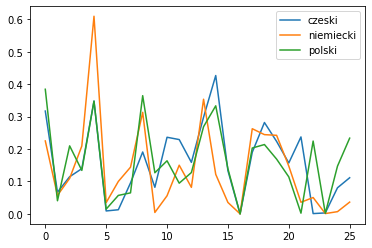

In [102]:
def plot_input_for_lang(lang, langs_dir):
    X = np.zeros(ord("z")-ord("a")+1)
    for root, dirs, files in os.walk(langs_dir):
        # print(root)
        if root.split(PATH_SPLITTER)[-1] == lang:
            for file in files:
                delete_non_ascii_characters(os.path.join(root, file))
                X += count_distinct_letters(os.path.join(root, file))
    X /= np.linalg.norm(X, ord=2)
    plt.plot(X)

print(LANGS_PATH)
plot_input_for_lang("czeski", LANGS_PATH)
plot_input_for_lang("niemiecki", LANGS_PATH)
plot_input_for_lang("polski", LANGS_PATH)

plt.legend(["czeski", "niemiecki", "polski"])
plt.show()

##Perceptrons definition and training

In [103]:
p_cz = Perceptron("czeski", theta, alpha=0.001, beta=0.01)
p_pl = Perceptron("polski", theta, alpha, beta)
p_de = Perceptron("niemiecki", theta, alpha, beta)

czeski
W: [ 0.03146129  0.04084327 -0.1488741   0.0836016  -0.25405102  0.14868703
 -0.02292293  0.19291908 -0.36314572  0.03264677  0.33222041  0.10611936
  0.18027742  0.08085902  0.12932592  0.03659882  0.12930751 -0.13907323
  0.03492035 -0.08368183  0.1552105   0.60203768 -0.28661966  0.08914532
  0.09402716  0.0485675 ]
theta: 0.01



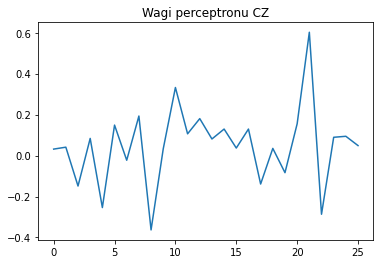

In [104]:
p_cz.train(LANGS_PATH, epochs)
p_cz.print_properties()

plt.title("Wagi perceptronu CZ")
plt.plot(p_cz.W)

polski
W: [-0.09743193  0.06087548  0.22488649  0.05539466 -0.37632951  0.16785232
 -0.07210804 -0.15339887 -0.03348764  0.08032403  0.23088412  0.07363256
  0.09542947 -0.05418786  0.22539197  0.16031499  0.16809215 -0.19765448
 -0.24143738 -0.23897509 -0.1248067  -0.22421815  0.27863467  0.27942469
  0.29613326  0.29630604]
theta: 0.001



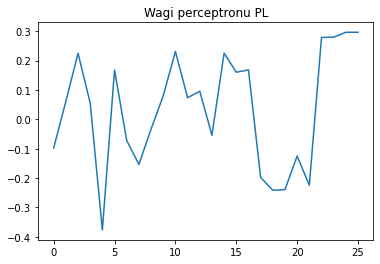

In [105]:
p_pl.train(LANGS_PATH, epochs)
p_pl.print_properties()

plt.title("Wagi perceptronu PL")
plt.plot(p_pl.W)

niemiecki
W: [-0.21737934  0.00146053 -0.03373825  0.09998102  0.27628911  0.13630685
  0.19091595  0.20816052 -0.08506383  0.00448648 -0.19433975  0.02442184
 -0.09072489 -0.13715762 -0.61914367 -0.12818788  0.22519251  0.18544078
 -0.14874562  0.0550367   0.04081356 -0.23409034  0.07382388  0.22925657
 -0.00221247 -0.26409922]
theta: 0.003



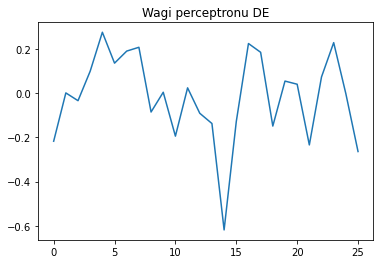

In [106]:
p_de.train(LANGS_PATH, epochs)
p_de.print_properties()

plt.title("Wagi perceptronu DE")
plt.plot(p_de.W)

##Perceptron testing on training data

In [107]:
print("CZ:", p_cz.test_all(LANGS_PATH))
print("PL:", p_pl.test_all(LANGS_PATH))
print("DE:", p_de.test_all(LANGS_PATH))

CZ: {'true_positives': 8, 'true_negatives': 10, 'false_positives': 0, 'false_negatives': 0}
PL: {'true_positives': 5, 'true_negatives': 13, 'false_positives': 0, 'false_negatives': 0}
DE: {'true_positives': 5, 'true_negatives': 13, 'false_positives': 0, 'false_negatives': 0}


##Guess the answer

In [119]:
def guess_language(file, perceptrons, show_full_result=False):
    p_guess = dict()
    delete_non_ascii_characters(file)
    for p in perceptrons:
        p_guess[p.lang] = p.guess_linear(file)
    if show_full_result:
        print(p_guess)
    return max(p_guess, key=p_guess.get)

In [131]:
language = guess_language(PATH + "paste_file.txt", [p_pl, p_cz, p_de], True)
print("Language:", language)

{'polski': -75.49457936930071, 'czeski': 113.58344975467043, 'niemiecki': -163.07016108153155}
Language: czeski
